In [3]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

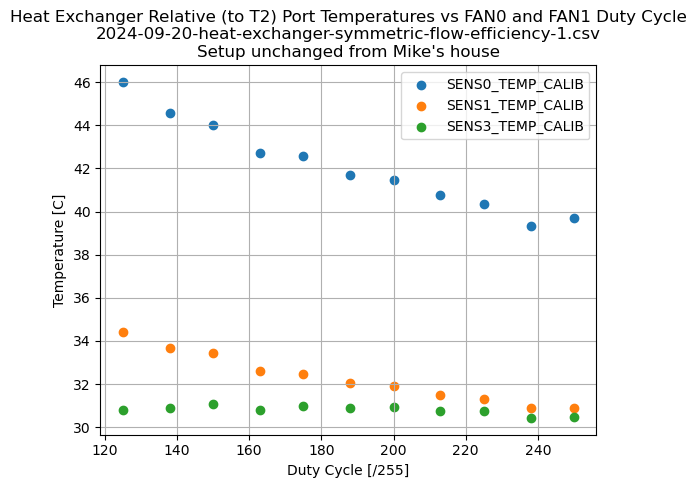

In [4]:
def plot_relative_temp(csv_file_name, title):
    data = pd.read_csv(csv_file_name)

    starting_ambient_temp = data["SENS2_TEMP"][0]
    data["SENS0_TEMP_CALIB"] = data["SENS0_TEMP"] - (data["SENS2_TEMP"] - starting_ambient_temp)
    data["SENS1_TEMP_CALIB"] = data["SENS1_TEMP"] - (data["SENS2_TEMP"] - starting_ambient_temp)
    data["SENS3_TEMP_CALIB"] = data["SENS3_TEMP"] - (data["SENS2_TEMP"] - starting_ambient_temp)
    
    # remove calibration rows
    data = data.drop(12)
    data = data.drop(0)

    
    plt.title(title)
    plt.ylabel('Temperature [C]')
    plt.xlabel('Duty Cycle [/255]')
    plt.scatter(y=data["SENS0_TEMP_CALIB"], x=data["FAN0"], label="SENS0_TEMP_CALIB")
    plt.scatter(y=data["SENS1_TEMP_CALIB"], x=data["FAN0"], label="SENS1_TEMP_CALIB")
    plt.scatter(y=data["SENS3_TEMP_CALIB"], x=data["FAN0"], label="SENS3_TEMP_CALIB")
    plt.grid(True)
    plt.legend()
    plt.show()
    
plot_relative_temp("data/2024-09-20-heat-exchanger-symmetric-flow-efficiency-1.csv",
'''Heat Exchanger Relative (to T2) Port Temperatures vs FAN0 and FAN1 Duty Cycle
2024-09-20-heat-exchanger-symmetric-flow-efficiency-1.csv
Setup unchanged from Mike's house''')

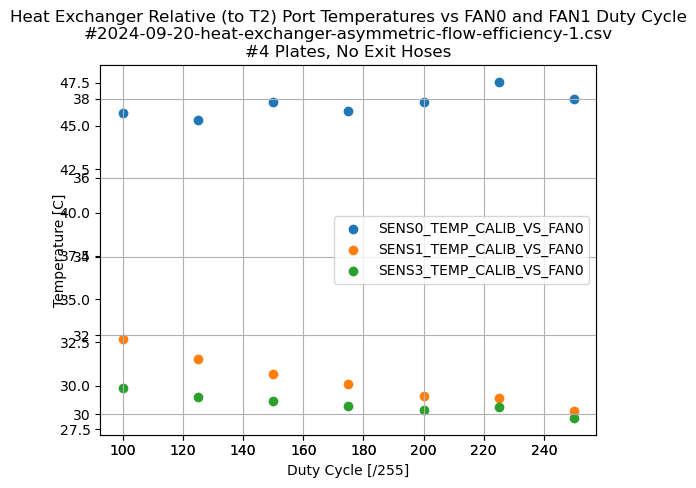

In [15]:
data = pd.read_csv("data/2024-09-20-heat-exchanger-asymmetric-flow-efficiency-1.csv")

starting_ambient_temp = data["SENS2_TEMP"][0]
data["SENS0_TEMP_CALIB"] = data["SENS0_TEMP"] - (data["SENS2_TEMP"] - starting_ambient_temp)
data["SENS1_TEMP_CALIB"] = data["SENS1_TEMP"] - (data["SENS2_TEMP"] - starting_ambient_temp)
data["SENS3_TEMP_CALIB"] = data["SENS3_TEMP"] - (data["SENS2_TEMP"] - starting_ambient_temp)

# remove calibration rows
data = data.drop(15)
data = data.drop(0)

data_fan0_255 = data[data.FAN0==255]
data_fan1_255 = data[data.FAN1==255]

fig = plt.figure()
ax_fan1 = fig.add_subplot()
ax_fan1.scatter(y=data_fan0_255["SENS0_TEMP_CALIB"], x=data_fan0_255["FAN1"], label="SENS0_TEMP_CALIB_VS_FAN1")
ax_fan1.scatter(y=data_fan0_255["SENS1_TEMP_CALIB"], x=data_fan0_255["FAN1"], label="SENS1_TEMP_CALIB_VS_FAN1")
ax_fan1.scatter(y=data_fan0_255["SENS3_TEMP_CALIB"], x=data_fan0_255["FAN1"], label="SENS3_TEMP_CALIB_VS_FAN1")

ax_fan0 = fig.add_subplot()
ax_fan0.scatter(y=data_fan1_255["SENS0_TEMP_CALIB"], x=data_fan1_255["FAN0"], label="SENS0_TEMP_CALIB_VS_FAN0")
ax_fan0.scatter(y=data_fan1_255["SENS1_TEMP_CALIB"], x=data_fan1_255["FAN0"], label="SENS1_TEMP_CALIB_VS_FAN0")
ax_fan0.scatter(y=data_fan1_255["SENS3_TEMP_CALIB"], x=data_fan1_255["FAN0"], label="SENS3_TEMP_CALIB_VS_FAN0")

plt.title('''Heat Exchanger Relative (to T2) Port Temperatures vs FAN0 and FAN1 Duty Cycle
#2024-09-20-heat-exchanger-asymmetric-flow-efficiency-1.csv
#4 Plates, No Exit Hoses''')
plt.ylabel('Temperature [C]')
plt.xlabel('Duty Cycle [/255]')

plt.grid(True)
plt.legend()
plt.show()